In [1]:
import pandas as pd
# taking date as index  for easy lookup
df = pd.read_csv('weather.csv', index_col="DATE") 
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,
2002-06-04,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.19,NaN,NaN,57.0,48.0
2002-06-05,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.13,NaN,NaN,74.0,52.0
2002-06-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,64.0,55.0
2002-06-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,71.0,52.0
2002-06-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,77.0,53.0
...,...,...,...,...,...,...,...,...,...,...
2023-02-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,2.0,40.0,48.0,32.0
2023-02-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,0.4,41.0,46.0,36.0
2023-02-09,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,1.11,NaN,40.0,45.0,36.0


checking how much percentage is empty

In [2]:
df.apply(pd.isnull).sum()/df.shape[0]*100 

STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
PRCP          2.087766
SNWD         66.808511
TAVG         11.156915
TMAX          1.196809
TMIN          1.077128
dtype: float64

Taking the columns that are only required

In [3]:
df_=df[['PRCP','SNWD','TMAX','TMIN']]

Checking wheather we have any funny values as instructued in the document(page-3)

In [4]:
df_[df_['TMIN']==9999]

,PRCP,SNWD,TMAX,TMIN
DATE,,,,


In [5]:
df_[df_['TMAX']==9999]

,PRCP,SNWD,TMAX,TMIN
DATE,,,,


In [6]:
df_[df_['PRCP']==9999]

,PRCP,SNWD,TMAX,TMIN
DATE,,,,


In [7]:
df_[df_['SNWD']==9999]

,PRCP,SNWD,TMAX,TMIN
DATE,,,,


filling the empty rows with zero

In [8]:
df_['PRCP']=df_['PRCP'].fillna(0) 

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\816914668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['PRCP']=df_['PRCP'].fillna(0) #filling the empty rows with zero


In [9]:
df_['SNWD']=df_['SNWD'].fillna(0)

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\1562736570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['SNWD']=df_['SNWD'].fillna(0)


interpolating means taking the average of the previous day and the next day

In [10]:
df_['TMAX']=df_['TMAX'].interpolate() 

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\3081799623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TMAX']=df_['TMAX'].interpolate() #interpolating means taking the average of the previous day and the next day


In [11]:
df_['TMIN']=df_['TMIN'].interpolate()

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\2754921492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TMIN']=df_['TMIN'].interpolate()


creating a list of maximum and minimum temp, and from the list we're taking the average of the temps

In [12]:
df_list=['TMAX','TMIN'] 
df_['TAvg']=df[df_list].mean(axis='columns') 

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\2552913516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TAvg']=df[df_list].mean(axis='columns') # from the above list we're taking the average of the temps


checking whether we have any null values in the dataset

In [13]:
df_.apply(pd.isnull).sum()/df_.shape[0] 

PRCP    0.00000
SNWD    0.00000
TMAX    0.00000
TMIN    0.00000
TAvg    0.00891
dtype: float64

In [14]:
df_['TAvg'].isnull().sum() 

67

In [15]:
df_.isnull().sum()

PRCP     0
SNWD     0
TMAX     0
TMIN     0
TAvg    67
dtype: int64

Again filling the empty rows using forwardfill method

In [16]:
df_['TAvg']=df_['TAvg'].fillna(method='ffill') 

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\2310665769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TAvg']=df_['TAvg'].fillna(method='ffill') #again filling the empty rows using forwardfill method


To check how much percentage of the dataset is filled 


In [17]:
missing_df = df_.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filled factor (%)']=(df_.shape[0]-missing_df['missing values'])/df_.shape[0]*100
missing_df.sort_values('filled factor (%)').reset_index(drop = True)

,variable,missing values,filled factor (%)
0,PRCP,0,100.0
1,SNWD,0,100.0
2,TMAX,0,100.0
3,TMIN,0,100.0
4,TAvg,0,100.0


In [40]:
df_

,PRCP,SNWD,TMAX,TMIN,TAvg,target_tavg
DATE,,,,,,
2002-06-04,0.19,0.0,57.0,48.0,52.5,63.0
2002-06-05,0.13,0.0,74.0,52.0,63.0,59.5
2002-06-06,0.00,0.0,64.0,55.0,59.5,61.5
2002-06-07,0.00,0.0,71.0,52.0,61.5,65.0
2002-06-08,0.00,0.0,77.0,53.0,65.0,73.5
...,...,...,...,...,...,...
2023-02-06,0.00,2.4,38.0,28.0,33.0,40.0
2023-02-07,0.00,2.0,48.0,32.0,40.0,41.0
2023-02-08,0.00,0.4,46.0,36.0,41.0,40.5


converting the index into datetime datatype 

In [18]:
df_.index

Index(['2002-06-04', '2002-06-05', '2002-06-06', '2002-06-07', '2002-06-08',
       '2002-06-09', '2002-06-10', '2002-06-11', '2002-06-12', '2002-06-13',
       ...
       '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11'],
      dtype='object', name='DATE', length=7520)

In [19]:
df_.index=pd.to_datetime(df_.index) 

In [20]:
df_.index

DatetimeIndex(['2002-06-04', '2002-06-05', '2002-06-06', '2002-06-07',
               '2002-06-08', '2002-06-09', '2002-06-10', '2002-06-11',
               '2002-06-12', '2002-06-13',
               ...
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11'],
              dtype='datetime64[ns]', name='DATE', length=7520, freq=None)

In [21]:
df_.index.year

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=7520)

Checking wheather we're missing any values

<AxesSubplot:xlabel='DATE'>

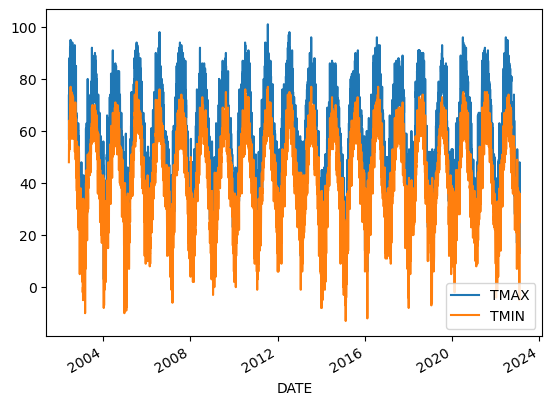

In [22]:
import matplotlib.pyplot as plt
df_[['TMAX','TMIN']].plot()


<AxesSubplot:xlabel='DATE'>

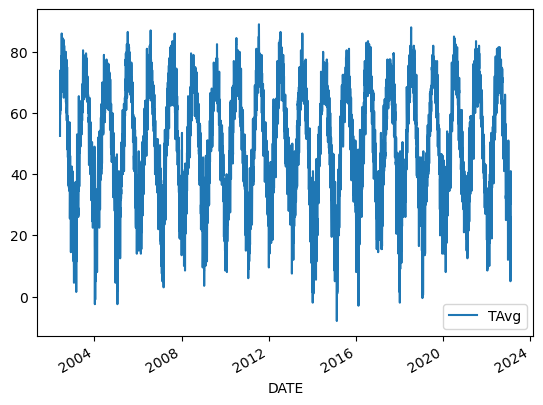

In [23]:
df_[['TAvg']].plot()

predicting tommorow's avgerage temp the shift(-1) pull every row back by one position

In [24]:
df_['target_tavg']=df_.shift(-1)["TAvg"] 

C:\Users\jibin\AppData\Local\Temp\ipykernel_7036\1644298594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['target_tavg']=df_.shift(-1)["TAvg"] #predicting tommorow's avgerage temp the shift(-1) pull every row back by one position


In [25]:
df_

,PRCP,SNWD,TMAX,TMIN,TAvg,target_tavg
DATE,,,,,,
2002-06-04,0.19,0.0,57.0,48.0,52.5,63.0
2002-06-05,0.13,0.0,74.0,52.0,63.0,59.5
2002-06-06,0.00,0.0,64.0,55.0,59.5,61.5
2002-06-07,0.00,0.0,71.0,52.0,61.5,65.0
2002-06-08,0.00,0.0,77.0,53.0,65.0,73.5
...,...,...,...,...,...,...
2023-02-07,0.00,2.0,48.0,32.0,40.0,41.0
2023-02-08,0.00,0.4,46.0,36.0,41.0,40.5
2023-02-09,1.11,0.0,45.0,36.0,40.5,35.5


We're skipping the last column since machine learning model doesn't works with null values

In [26]:
df_=df_.iloc[:-1,:].copy() 

In [27]:
df_

,PRCP,SNWD,TMAX,TMIN,TAvg,target_tavg
DATE,,,,,,
2002-06-04,0.19,0.0,57.0,48.0,52.5,63.0
2002-06-05,0.13,0.0,74.0,52.0,63.0,59.5
2002-06-06,0.00,0.0,64.0,55.0,59.5,61.5
2002-06-07,0.00,0.0,71.0,52.0,61.5,65.0
2002-06-08,0.00,0.0,77.0,53.0,65.0,73.5
...,...,...,...,...,...,...
2023-02-06,0.00,2.4,38.0,28.0,33.0,40.0
2023-02-07,0.00,2.0,48.0,32.0,40.0,41.0
2023-02-08,0.00,0.4,46.0,36.0,41.0,40.5


Importing Ridge regression model and initialising in it

In [28]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1) 

creating a list of variable that can be used for prediction

In [29]:
predictors=["PRCP","TMAX","TMIN","TAvg"] 

taking the data for training upto 2020-12-31

In [30]:
train=df_.loc[:'2020-12-31'] 

taking the data for testing from 2021-01-01

In [31]:
test=df_.loc['2021-01-01':] 

 calling fit method to predict the data

In [32]:
reg.fit(train[predictors],train["target_tavg"])

Ridge(alpha=0.1)

 we predict the data using our test dataset

In [33]:
predictions = reg.predict(test[predictors])

calculating the error

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(test['target_tavg'], predictions) 

4.176131314449881

On Average our model gives 4.17 error from the actual temp

In [36]:
combined_tavg=pd.concat([test["target_tavg"], pd.Series(predictions, index=test.index)], axis =1)
combined_tavg.columns = ['actual','predictions']
combined_tavg

,actual,predictions
DATE,,
2021-01-01,33.0,33.790394
2021-01-02,34.0,33.268263
2021-01-03,33.5,35.626797
2021-01-04,34.0,35.479826
2021-01-05,33.5,36.006429
...,...,...
2023-02-06,40.0,34.238555
2023-02-07,41.0,40.360068
2023-02-08,40.5,41.976742


Using the chart to see how different the predicted data is from the actual

<AxesSubplot:xlabel='DATE'>

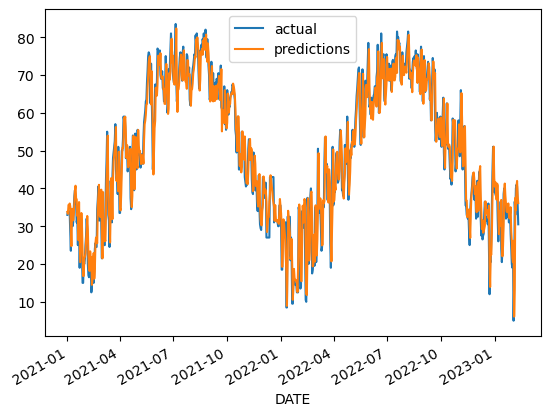

In [37]:
combined_tavg.plot() 

calculating the difference between the predicted and the original

In [38]:
combined_tavg['diff'] = combined_tavg['predictions']- combined_tavg['actual'] 

In [39]:
combined_tavg

,actual,predictions,diff
DATE,,,
2021-01-01,33.0,33.790394,0.790394
2021-01-02,34.0,33.268263,-0.731737
2021-01-03,33.5,35.626797,2.126797
2021-01-04,34.0,35.479826,1.479826
2021-01-05,33.5,36.006429,2.506429
...,...,...,...
2023-02-06,40.0,34.238555,-5.761445
2023-02-07,41.0,40.360068,-0.639932
2023-02-08,40.5,41.976742,1.476742
